**Alison Glazer**
<br>
**In Progress**
# Airbnb Smart Pricing - Clustering Listings (Unfinished!!)
Rather than try to build a one-size-fits-all model for all listings, we will build clusters for all of the listings to group them and build separate models for each group

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Display-Options" data-toc-modified-id="Display-Options-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Display Options</a></span></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Select-Features-for-Clustering" data-toc-modified-id="Select-Features-for-Clustering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Select Features for Clustering</a></span></li><li><span><a href="#Scale-the-Data" data-toc-modified-id="Scale-the-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scale the Data</a></span></li><li><span><a href="#Clustering-on-raw-data" data-toc-modified-id="Clustering-on-raw-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Clustering on raw data</a></span><ul class="toc-item"><li><span><a href="#KMeans" data-toc-modified-id="KMeans-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>KMeans</a></span></li><li><span><a href="#Mean-Shift" data-toc-modified-id="Mean-Shift-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Mean Shift</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#Hierarchical-Agglomerative-Clustering" data-toc-modified-id="Hierarchical-Agglomerative-Clustering-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Hierarchical Agglomerative Clustering</a></span><ul class="toc-item"><li><span><a href="#Generating-Flat-Clusters-with-Max-Clusters" data-toc-modified-id="Generating-Flat-Clusters-with-Max-Clusters-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Generating Flat Clusters with Max Clusters</a></span></li></ul></li></ul></li><li><span><a href="#Clustering-on-reduced-dimensions" data-toc-modified-id="Clustering-on-reduced-dimensions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Clustering on reduced dimensions</a></span><ul class="toc-item"><li><span><a href="#Prep-Data:-PCA" data-toc-modified-id="Prep-Data:-PCA-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Prep Data: PCA</a></span></li><li><span><a href="#KMeans-(reduced)" data-toc-modified-id="KMeans-(reduced)-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>KMeans (reduced)</a></span></li><li><span><a href="#Mean-Shift-(reduced)" data-toc-modified-id="Mean-Shift-(reduced)-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Mean Shift (reduced)</a></span></li><li><span><a href="#DBSCAN-(reduced)" data-toc-modified-id="DBSCAN-(reduced)-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>DBSCAN (reduced)</a></span></li><li><span><a href="#Hierarchical-Agglomerative-Clustering-(reduced)" data-toc-modified-id="Hierarchical-Agglomerative-Clustering-(reduced)-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Hierarchical Agglomerative Clustering (reduced)</a></span></li></ul></li><li><span><a href="#Describe-Clusters" data-toc-modified-id="Describe-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Describe Clusters</a></span></li></ul></div>

## Import Libraries

In [333]:
# Data
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import silhouette_score

from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth

from fastcluster import linkage, pdist
from scipy.cluster.hierarchy import dendrogram, fcluster, cophenet, set_link_color_palette
from scipy.spatial.distance import squareform

# PCA
from sklearn.decomposition import PCA

# Saving
import pickle

## Display Options

In [334]:
# Colors sourced from here: https://usbrandcolors.com/airbnb-colors/
bnb_red = '#FF5A5F'
bnb_blue = '#00A699'
bnb_orange = '#FC642D'
bnb_lgrey = '#767676'
bnb_dgrey = '#484848'
bnb_maroon = '#92174D'

In [335]:
pd.options.display.max_columns = 120

## Load the Data

In [336]:
# Load Seattle Listings Features
with open('data/sea_X.pickle', 'rb') as to_read:
    X = pickle.load(to_read)

## Select Features for Clustering
Let's only consider the features that intuitively should affect the results of the clustering

In [338]:
del X['room_type_num']

In [339]:
cluster_cols = [
    'availability_365', 'room_Entire home/apt', 'room_Private room',
    'room_Shared room', 'accommodates', 'minimum_nights'
]

In [340]:
X_cluster = X[cluster_cols]

## Scale the Data

In [341]:
# Use standard scaler to scale the data
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X_cluster.values),
                              columns=X_cluster.columns)

## Clustering on raw data

### KMeans

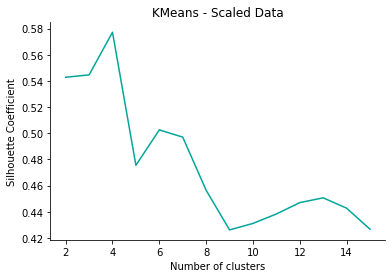

In [342]:
# Find optimum number of clusters
k_range = range(2,16)
kmeans_scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=1,n_init=20,max_iter=400)
    km_ss.fit(X_scaled)
    kmeans_scores.append(silhouette_score(X_scaled, km_ss.labels_))

# plot the results
sns.mpl.pyplot.plot(k_range, kmeans_scores, color=bnb_blue)
sns.mpl.pyplot.xlabel('Number of clusters')
sns.mpl.pyplot.ylabel('Silhouette Coefficient')
sns.despine()
plt.title('KMeans - Scaled Data');

In [344]:
# 4 gives the highest silhouette score, let's start there
k = 4
km_4 = KMeans(n_clusters=k, random_state=1,n_init=20,max_iter=400)
km_4.fit(X_scaled);
print('Silhouette score for {} clusters = {}'.format(k,silhouette_score(X_scaled, km_4.labels_)))

Silhouette score for 4 clusters = 0.5772594673991269


In [345]:
# Looking at cluster sizes
np.unique(km_4.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([2656,  697,   27,  115]))

### Mean Shift

In [273]:
# estimate bandwidth 
bandwidth = estimate_bandwidth(X_scaled, quantile=0.99, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_scaled)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


In [274]:
silhouette_score(X_scaled, ms.labels_)

0.612797934331648

In [275]:
# Looking at cluster sizes
np.unique(ms.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([3480,    4,    4,    4,    3]))

### DBSCAN

In [119]:
db = DBSCAN(eps=5, min_samples=5)
db_model = db.fit(X_scaled)
db_cluster_labels = db_model.labels_.tolist()
db_feat_and_target = X_scaled.copy()
db_feat_and_target['cluster_label'] = db_cluster_labels

In [120]:
np.unique(db_model.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
 array([2568,   14,   24,    5,  337,   15,   17,   16,   40,    6,   28,
           8,   10,   21,   17,    5,    7,   44,    5,    5,    9,   11,
           7,    5,    5,    5,    5,    9,   26,   10,    7,    6,    5,
           6,   13,    5,    9,    5,    8,    7,    7,    6,    5,   13,
           6,    6,    5,    3,    5,    7,    9,    5,   10,    5,    8,
           7,    5,    5,   11,    5,    7]))

In [121]:
silhouette_score(X_scaled, db_model.labels_)

-0.18525008885615404

### Hierarchical Agglomerative Clustering

In [6]:
Z_single = linkage(X_scaled, metric='euclidean', method='single')

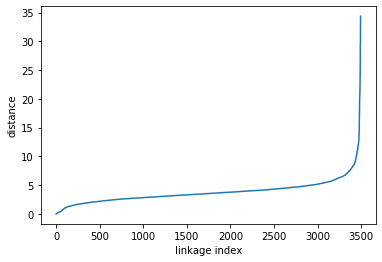

In [7]:
sns.mpl.pyplot.plot(np.arange(Z_single.shape[0]),Z_single[:,2])
sns.mpl.pyplot.xlabel("linkage index")
sns.mpl.pyplot.ylabel("distance");

In [11]:
distances_euclidean = pdist(X_scaled, metric='euclidean')
avg_cophenet,coph_dists = cophenet(Z_single,distances_euclidean)
print("Cophenetic correlation, euclidean distance with single linkage:",avg_cophenet)

Cophenetic correlation, euclidean distance with single linkage: 0.9053652973569198


In [30]:
Z_average = linkage(X_scaled, metric='euclidean', method='average')
Z_complete = linkage(X_scaled, metric='euclidean', method='complete')
Z_ward = linkage(X_scaled, metric='euclidean', method='ward')

In [31]:
avg_cophenet,coph_dists = cophenet(Z_average,distances_euclidean)
print("Cophenetic correlation, euclidean distance with average linkage:",avg_cophenet)
avg_cophenet,coph_dists = cophenet(Z_complete,distances_euclidean)
print("Cophenetic correlation, euclidean distance with complete linkage:",avg_cophenet)
avg_cophenet,coph_dists = cophenet(Z_ward,distances_euclidean)
print("Cophenetic correlation, euclidean distance with ward linkage:",avg_cophenet)

Cophenetic correlation, euclidean distance with average linkage: 0.9442211083454171
Cophenetic correlation, euclidean distance with complete linkage: 0.8564965657614482
Cophenetic correlation, euclidean distance with ward linkage: 0.30016189323913345


The method that preserves the original distance metric the most is the average linkage method. This makes sense because now each point is equally contributing to how the values get agglomerated. Single and complete are more like all-for-one.

Ward gives the largest amount of warping because large distances get penalized more than small distances (since we are squaring), so outliers will get penalized a lot more. This will warp the distance matrix the most.

Because of this we have different ways that outliers get treated

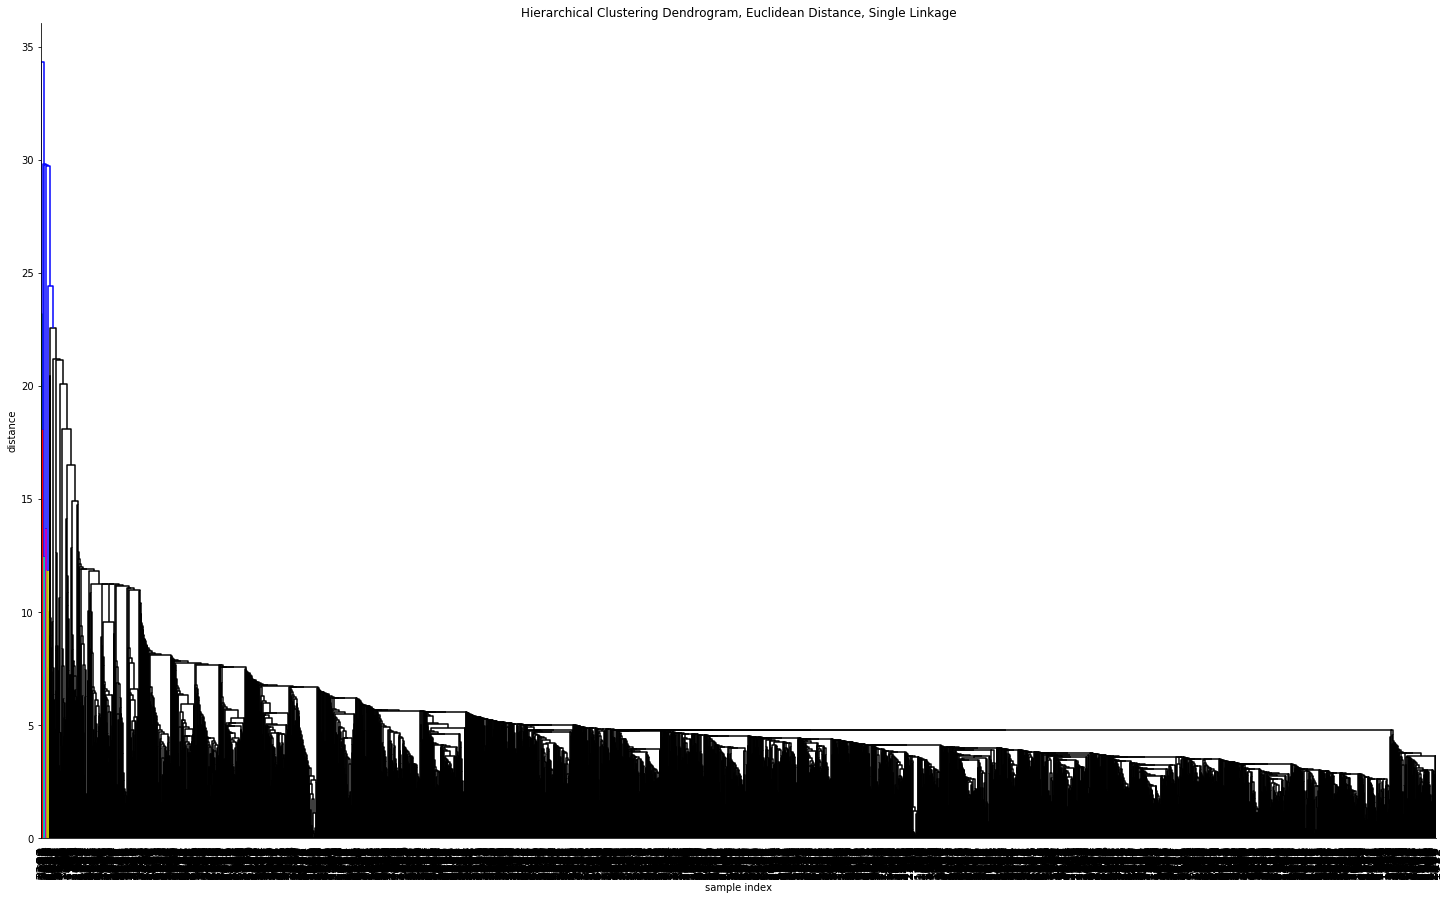

In [12]:
# calculate full dendrogram
sns.mpl.pyplot.figure(figsize=(25, 15))
sns.mpl.pyplot.title('Hierarchical Clustering Dendrogram, Euclidean Distance, Single Linkage')
sns.mpl.pyplot.xlabel('sample index')
sns.mpl.pyplot.ylabel('distance')
dendrogram(
    Z_single,
    leaf_rotation=90.,  # rotates the x axis labels 90 degrees
    leaf_font_size=13.,  # font size for the x axis labels
) # just needs a linkage matrix
sns.despine()
sns.mpl.pyplot.show()

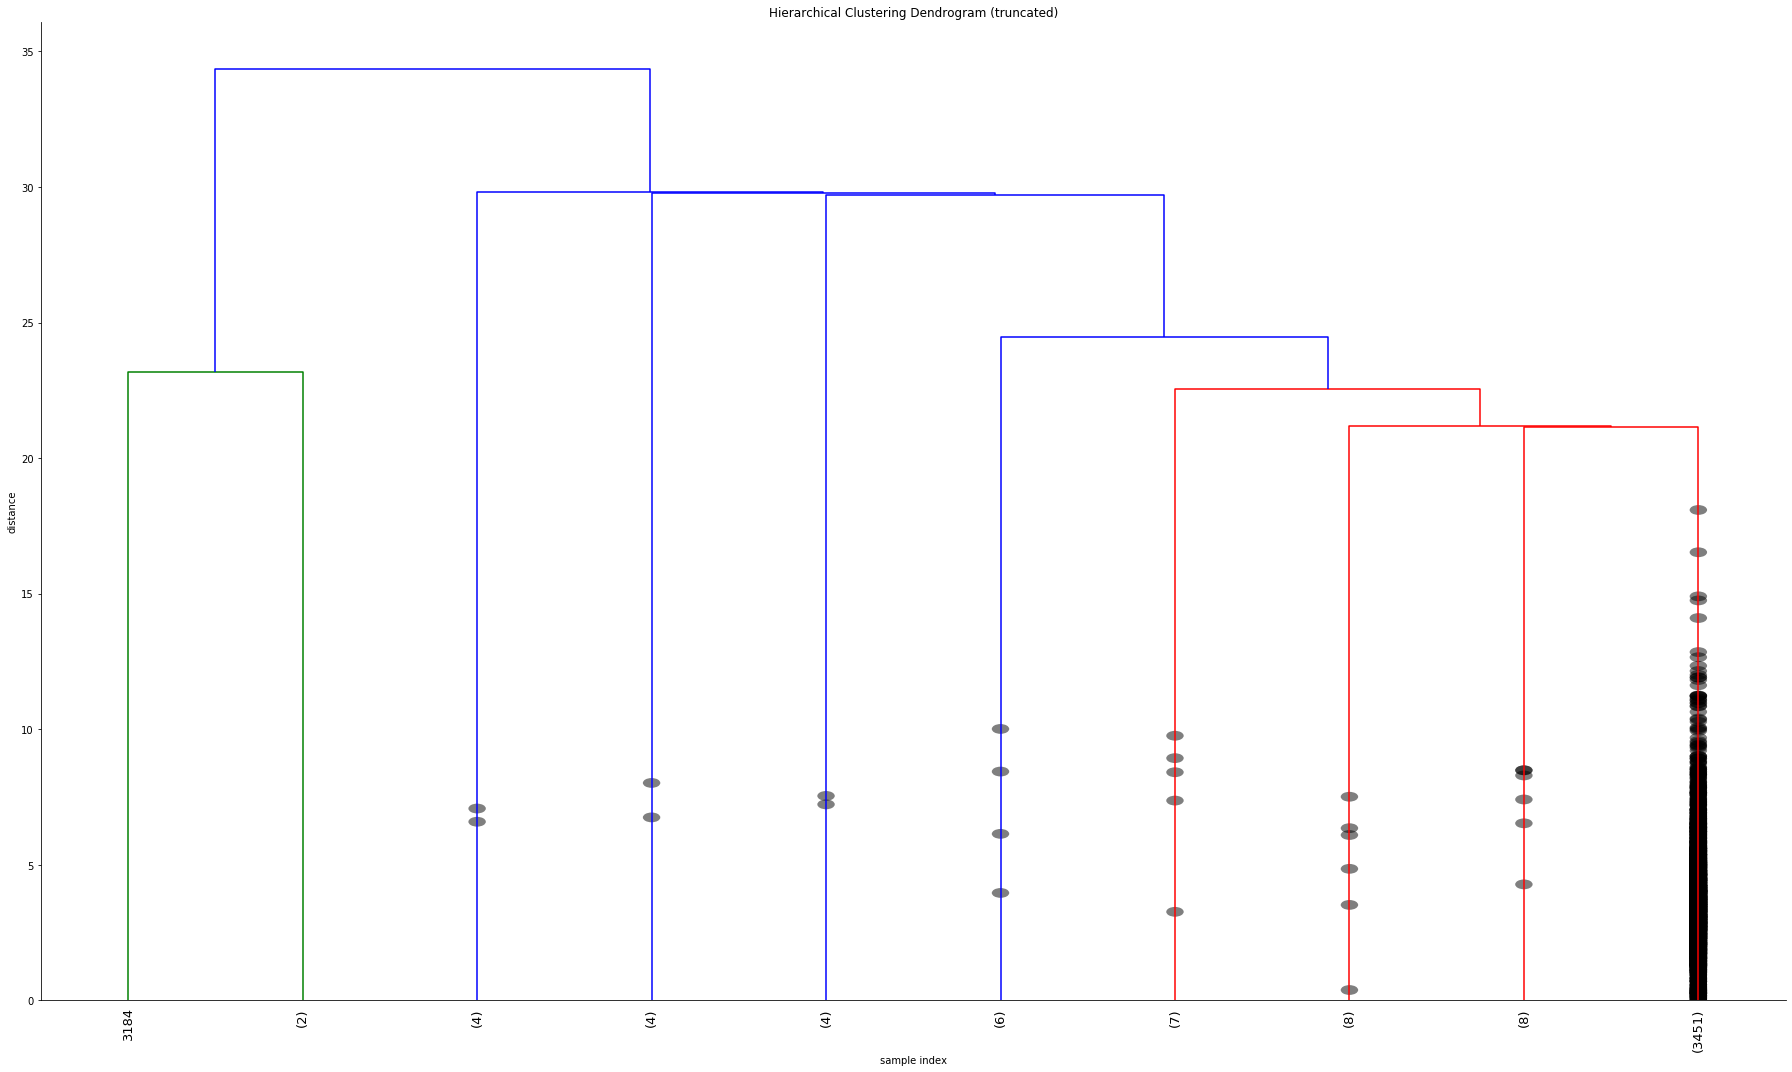

In [32]:
sns.mpl.pyplot.figure(figsize=(25, 15))
sns.mpl.pyplot.title('Hierarchical Clustering Dendrogram (truncated)')
sns.mpl.pyplot.xlabel('sample index')
sns.mpl.pyplot.ylabel('distance')
dendrogram(
    Z_single,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=13.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
sns.despine()

sns.mpl.pyplot.tight_layout()
sns.mpl.pyplot.show()

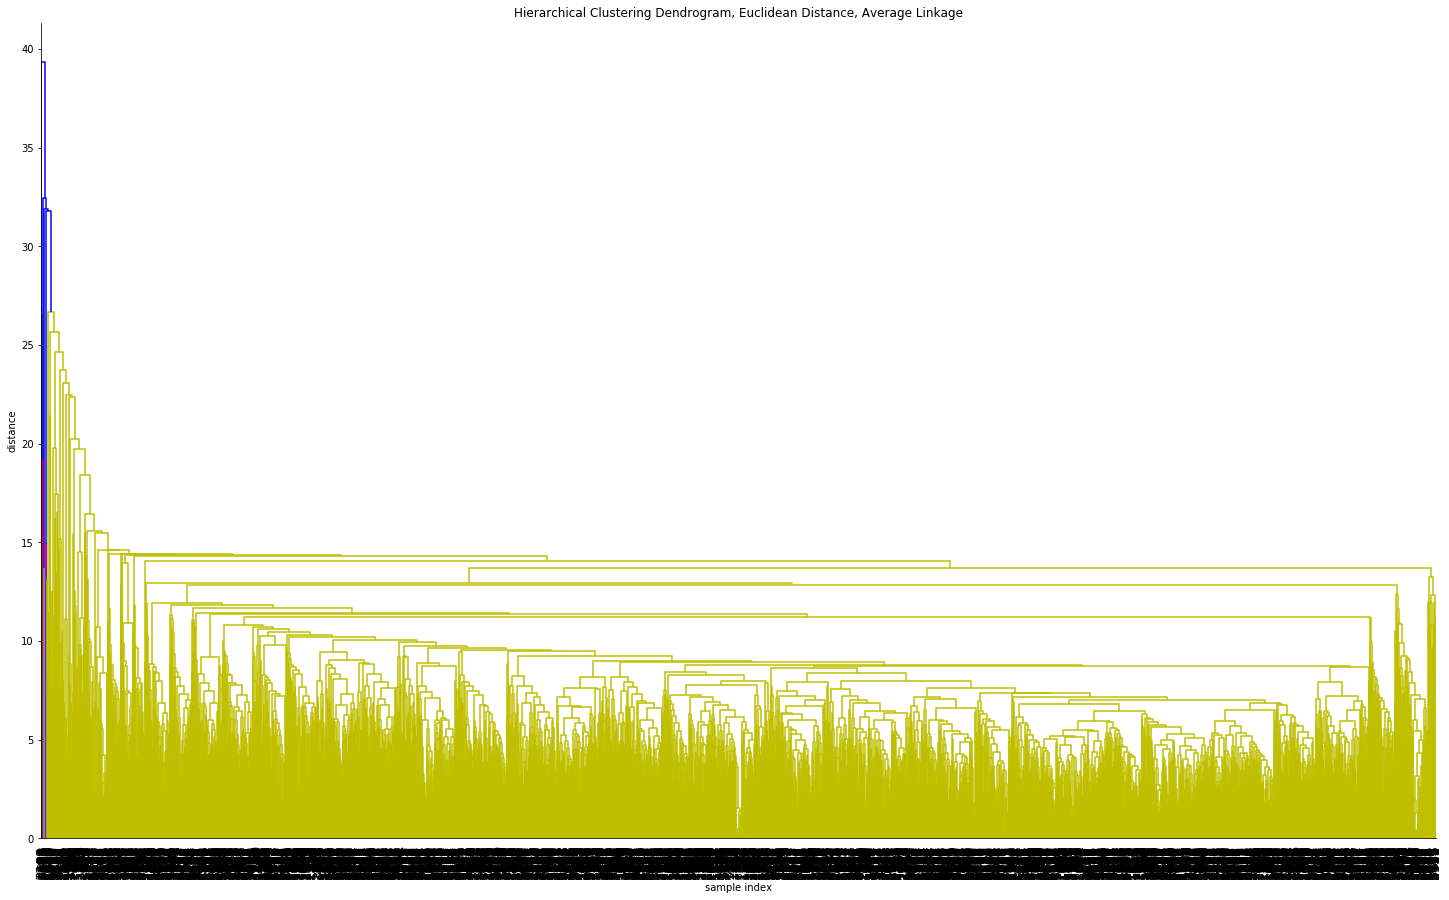

In [33]:
# calculate full dendrogram
sns.mpl.pyplot.figure(figsize=(25, 15))
sns.mpl.pyplot.title('Hierarchical Clustering Dendrogram, Euclidean Distance, Average Linkage')
sns.mpl.pyplot.xlabel('sample index')
sns.mpl.pyplot.ylabel('distance')
dendrogram(
    Z_average,
    leaf_rotation=90.,  # rotates the x axis labels 90 degrees
    leaf_font_size=13.,  # font size for the x axis labels
) # just needs a linkage matrix
sns.despine()
sns.mpl.pyplot.show()

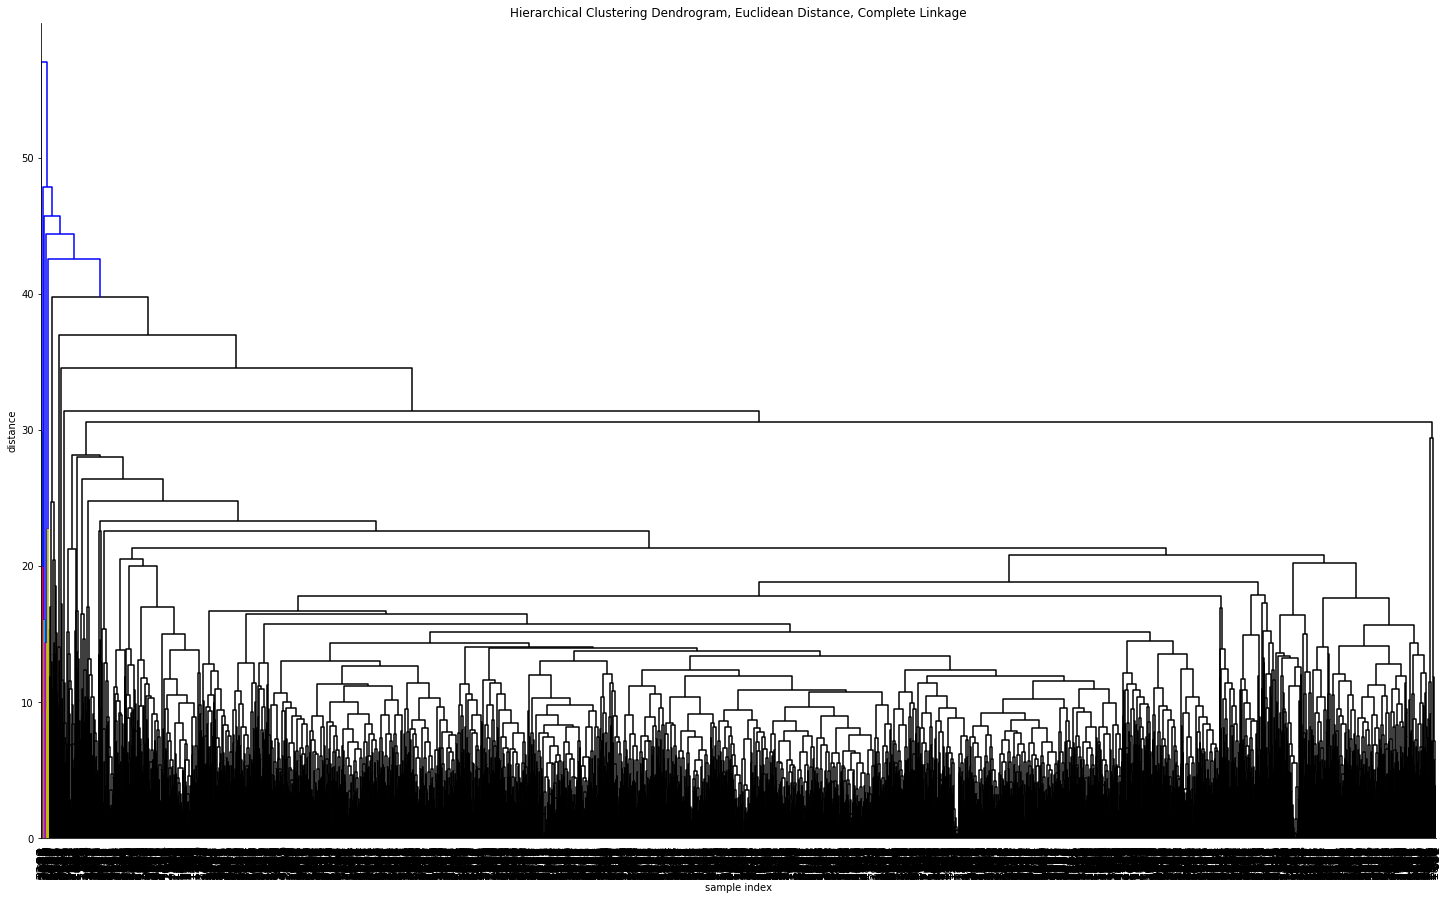

In [34]:
# calculate full dendrogram
sns.mpl.pyplot.figure(figsize=(25, 15))
sns.mpl.pyplot.title('Hierarchical Clustering Dendrogram, Euclidean Distance, Complete Linkage')
sns.mpl.pyplot.xlabel('sample index')
sns.mpl.pyplot.ylabel('distance')
dendrogram(
    Z_complete,
    leaf_rotation=90.,  # rotates the x axis labels 90 degrees
    leaf_font_size=13.,  # font size for the x axis labels
) # just needs a linkage matrix
sns.despine()
sns.mpl.pyplot.show()

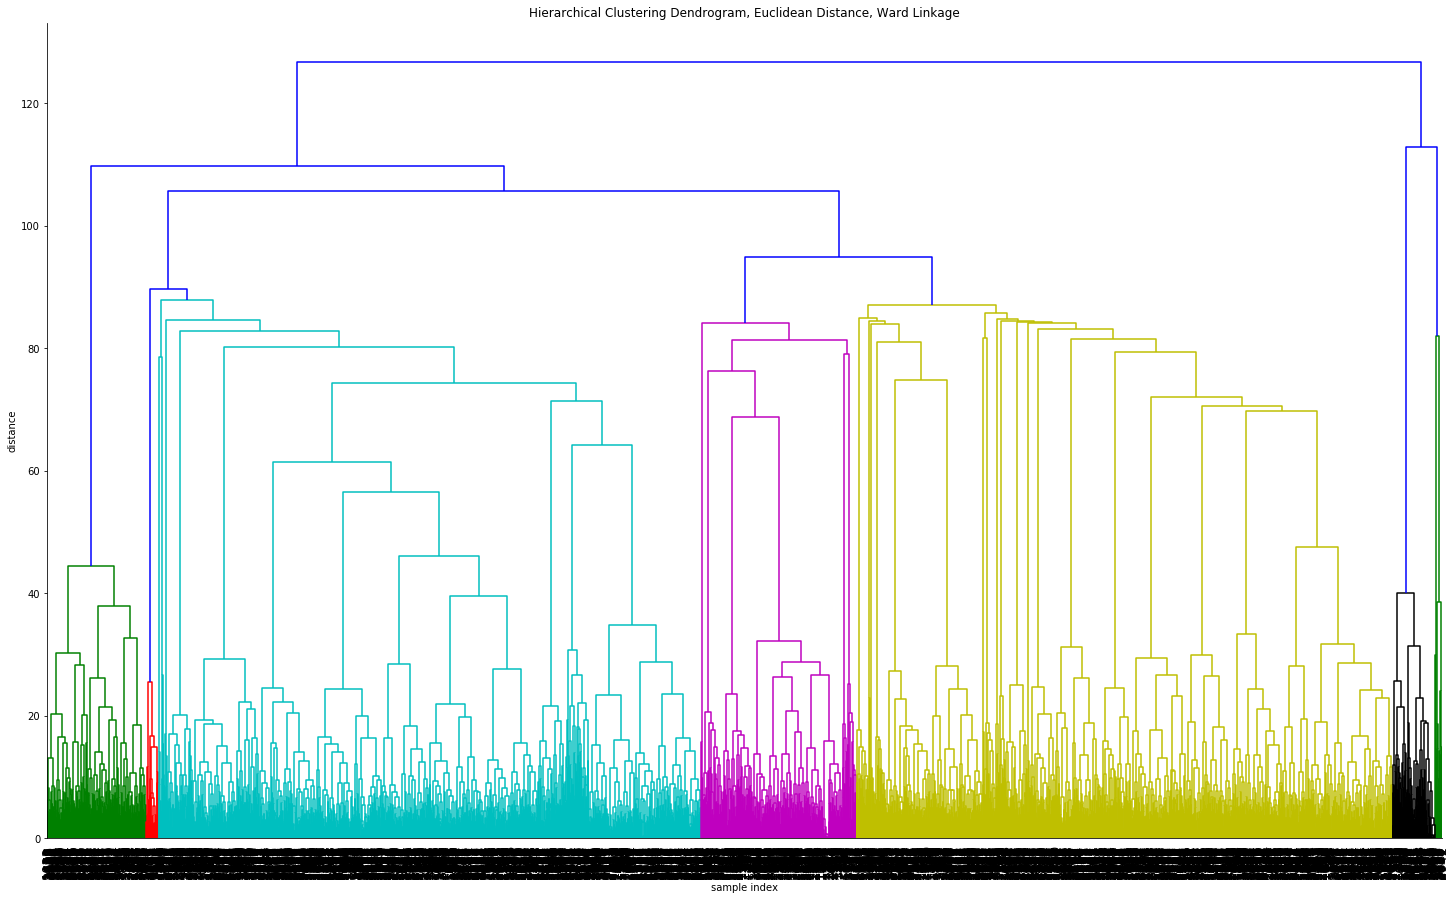

In [35]:
# calculate full dendrogram
sns.mpl.pyplot.figure(figsize=(25, 15))
sns.mpl.pyplot.title('Hierarchical Clustering Dendrogram, Euclidean Distance, Ward Linkage')
sns.mpl.pyplot.xlabel('sample index')
sns.mpl.pyplot.ylabel('distance')
dendrogram(
    Z_ward,
    leaf_rotation=90.,  # rotates the x axis labels 90 degrees
    leaf_font_size=13.,  # font size for the x axis labels
) # just needs a linkage matrix
sns.despine()
sns.mpl.pyplot.show()

#### Generating Flat Clusters with Max Clusters

In [313]:
max_clust = 4
clusters_max_3clust = fcluster(Z_complete, max_clust, criterion='maxclust')
clusters_max_3clust

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [314]:
pd.Series([ "cluster_"+ str(cl) for cl in clusters_max_3clust ]).value_counts()

cluster_4    3484
cluster_3       4
cluster_2       4
cluster_1       3
dtype: int64

In [315]:
silhouette_score(X_scaled,clusters_max_3clust)

0.6121194315118752

## Clustering on reduced dimensions

### Prep Data: PCA

In [215]:
# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=15)
pca.fit(X_scaled)
pcafeatures_scaled = pca.transform(X_scaled)

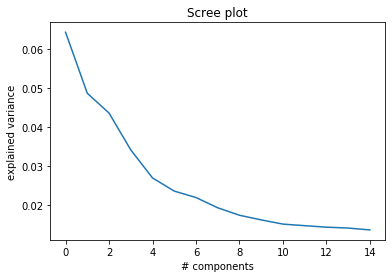

In [216]:
pca.explained_variance_ratio_


plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot');

Elbow is at 4, use 4 components

In [233]:
pca = PCA(n_components=4)
pca.fit(X_scaled)
pcafeatures_scaled = pca.transform(X_scaled)

### KMeans (reduced)

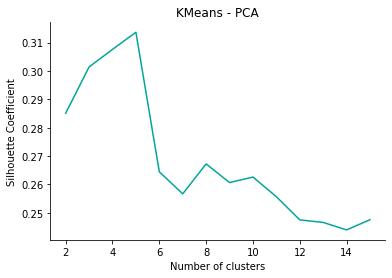

In [234]:
# Find optimum number of clusters
k_range = range(2,16)
kmeans_scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=1,n_init=20,max_iter=400)
    km_ss.fit(pcafeatures_scaled)
    kmeans_scores.append(silhouette_score(pcafeatures_scaled, km_ss.labels_))

# plot the results
sns.mpl.pyplot.plot(k_range, kmeans_scores, color=bnb_blue)
sns.mpl.pyplot.xlabel('Number of clusters')
sns.mpl.pyplot.ylabel('Silhouette Coefficient')
sns.despine()
plt.title('KMeans - PCA');

In [319]:
# 5 has the highest silhouette score
k = 5
km_5 = KMeans(n_clusters=k, random_state=1,n_init=20,max_iter=400)
km_5.fit(pcafeatures_scaled);
print('Silhouette score for {} clusters = {}'.format(k,silhouette_score(pcafeatures_scaled, km_5.labels_)))

Silhouette score for 5 clusters = 0.3136614852239422


In [320]:
# Looking at cluster sizes
np.unique(km_5.labels_, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([1816,  757,  470,   20,  432]))

In [325]:
# Add cluster labels as column in dataframe
X_scaled['cluster_labels'] = km_5.labels_

### Mean Shift (reduced)

In [316]:
# estimate bandwidth 
bandwidth = estimate_bandwidth(pcafeatures_scaled, quantile=0.3, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pcafeatures_scaled)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 8


In [317]:
np.unique(ms.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([3363,   95,    5,   11,   16,    2,    2,    1]))

In [318]:
silhouette_score(pcafeatures_scaled, ms.labels_)

0.46412190949451576

### DBSCAN (reduced)

In [260]:
db = DBSCAN(eps=3.5, min_samples=3)
db_model = db.fit(pcafeatures_scaled)
db_cluster_labels = db_model.labels_.tolist()

In [261]:
np.unique(db_model.labels_, return_counts=True)

(array([-1,  0,  1]), array([   7, 3484,    4]))

In [262]:
silhouette_score(X_scaled, db_model.labels_)

0.584724692373736

### Hierarchical Agglomerative Clustering (reduced)

## Describe Clusters

In [330]:
X_scaled.groupby('cluster_labels').agg(['mean','std'])

host_response_rate           host_is_superhost            \
                             mean       std              mean       std   
cluster_labels                                                            
0                        0.435788  0.173132          0.450665  0.905140   
1                       -1.241666  1.317598         -0.629763  0.757308   
2                        0.082704  0.919375          0.041354  1.001217   
3                       -0.133255  1.114791         -0.975968  0.000000   
4                        0.260057  0.615613         -0.790728  0.580565   

               accommodates           bathrooms            bedrooms            \
                       mean       std      mean       std      mean       std   
cluster_labels                                                                  
0                 -0.207607  0.630612 -0.310292  0.430717 -0.277253  0.674812   
1                 -0.479129  0.594787 -0.094782  0.885061 -0.155051  0.625503   
2                  1.743892  1.160571  1.603852  1.449889  1.751096  0.965678   
3                 -0.121628  0.933764 -0.018082  1.172747  0.032479  0.590510   
4                 -0.179356  0.612916 -0.273630  0.551382 -0.469445  0.737672   

                    beds           security_deposit           cleaning_fee  \
                    mean       std             mean       std         mean   
cluster_labels                                                               
0              -0.211075  0.663716        -0.142448  0.812495    -0.220876   
1              -0.392771  0.577035        -0.267344  0.662403    -0.604042   
2               1.687765  1.197915         0.667857  1.536761     1.546638   
3              -0.241303  0.732387         0.155358  0.989271     0.056022   
4              -0.249502  0.674287         0.333484  1.066031     0.301691   

                         minimum_nights           maximum_nights            \
                     std           mean       std           mean       std   
cluster_labels                                                               
0               0.585592      -0.155021  0.533376      -0.176155  0.975060   
1               0.601526       0.211445  1.414793       0.090069  1.012476   
2               1.225539       0.110804  1.112697       0.276315  0.967433   
3               1.127801      -0.023475  0.871169       0.275673  0.957085   
4               0.890807       0.161681  1.341611       0.269293  0.971569   

               number_of_reviews           number_of_reviews_ltm            \
                            mean       std                  mean       std   
cluster_labels                                                               
0                       0.419806  1.081737              0.553829  0.925676   
1                      -0.587207  0.484252             -0.907583  0.333194   
2                      -0.276280  0.691623             -0.197066  0.803900   
3                      -0.829934  0.005369             -1.043656  0.026029   
4                      -0.396761  0.792685             -0.475042  0.737856   

               review_scores_rating           review_scores_accuracy  \
                               mean       std                   mean   
cluster_labels                                                         
0                          0.208149  0.357856               0.215645   
1                          0.088378  0.742671               0.069799   
2                          0.158804  0.627400               0.115703   
3                         -8.345495  2.054837              -8.106788   
4                         -0.816272  1.365399              -0.779383   

                         review_scores_cleanliness            \
                     std                      mean       std   
cluster_labels                                                 
0               0.347520                  0.200437  0.502070   
1               0.683869                 -0.058433  0.982

In [331]:
# Save for later
with open('data/sea_clusters.pickle', 'wb') as to_write:
    pickle.dump(X_scaled['cluster_labels'], to_write)